In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Dataset
The dataset used here was the result of some data transformations. <br>
<a href="https://colab.research.google.com/drive/1o13JOZzm3lGYaIkCZXW12AelCWBiGldc?usp=sharing" >Notebook for Data Extraction</a>

In [ ]:
fpath = "/content/drive/MyDrive/Colab Notebooks/hamoye/"

In [ ]:
df = pd.read_csv(fpath+"datasets/final_data.csv")
#df = pd.read_csv(fpath+"datasets/hospital_customer_satisfaction.csv")
df.head()

,facility_id,year,facility_name,city,state,number_of_completed_surveys,survey_response_rate_percent,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_promoting_interoperability_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,summary_star_rating,nurse_communication_-_linear_mean_score,cleanliness_-_linear_mean_score,cleanliness_-_star_rating,nurse_communication_-_star_rating,doctor_communication_-_linear_mean_score,doctor_communication_-_star_rating,staff_responsiveness_-_linear_mean_score,staff_responsiveness_-_star_rating,pain_management_-_linear_mean_score,pain_management_-_star_rating,communication_about_medicines_-_linear_mean_score,communication_about_medicines_-_star_rating,discharge_information_-_linear_mean_score,discharge_information_-_star_rating,care_transition_-_linear_mean_score,care_transition_-_star_rating,overall_hospital_rating_-_linear_mean_score,overall_hospital_rating_-_star_rating,quietness_-_linear_mean_score,quietness_-_star_rating,recommend_hospital_-_linear_mean_score,recommend_hospital_-_star_rating
0,010001,2016,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,1213,27,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,3.0,90.0,84.0,2.0,3.0,92.0,3.0,79.0,2.0,86.0,2.0,79.0,3.0,89.0,4.0,82.0,3.0,89.0,4.0,88.0,4.0,89.0,3.0
1,010001,2017,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,1332,25,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,3.0,89.0,84.0,2.0,2.0,92.0,3.0,80.0,2.0,85.0,3.0,77.0,2.0,87.0,3.0,80.0,3.0,88.0,3.0,87.0,4.0,88.0,3.0
2,010001,2018,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,463,20,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,2.0,88.0,83.0,2.0,2.0,90.0,3.0,77.0,1.0,NaN,NaN,73.0,2.0,85.0,3.0,79.0,2.0,86.0,3.0,86.0,4.0,86.0,3.0
3,010001,2019,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,558,23,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average,2.0,88.0,87.0,3.0,2.0,90.0,2.0,79.0,2.0,NaN,NaN,73.0,2.0,86.0,3.0,80.0,2.0,85.0,2.0,86.0,4.0,87.0,3.0
4,010001,2020,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,535,22,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,3.0,90.0,88.0,3.0,3.0,91.0,3.0,83.0,3.0,NaN,NaN,79.0,3.0,90.0,4.0,81.0,2.0,88.0,3.0,86.0,4.0,90.0,4.0


In [ ]:
df.tail()

,facility_id,year,facility_name,city,state,number_of_completed_surveys,survey_response_rate_percent,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_promoting_interoperability_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,summary_star_rating,nurse_communication_-_linear_mean_score,cleanliness_-_linear_mean_score,cleanliness_-_star_rating,nurse_communication_-_star_rating,doctor_communication_-_linear_mean_score,doctor_communication_-_star_rating,staff_responsiveness_-_linear_mean_score,staff_responsiveness_-_star_rating,pain_management_-_linear_mean_score,pain_management_-_star_rating,communication_about_medicines_-_linear_mean_score,communication_about_medicines_-_star_rating,discharge_information_-_linear_mean_score,discharge_information_-_star_rating,care_transition_-_linear_mean_score,care_transition_-_star_rating,overall_hospital_rating_-_linear_mean_score,overall_hospital_rating_-_star_rating,quietness_-_linear_mean_score,quietness_-_star_rating,recommend_hospital_-_linear_mean_score,recommend_hospital_-_star_rating
23923,670127,2020,EL PASO LTAC HOSPTIAL,EL PASO,TX,Not Available,Not Available,Acute Care Hospitals,Physician,No,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23924,670128,2019,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,PFLUGERVILLE,TX,Not Available,Not Available,Acute Care Hospitals,Voluntary non-profit - Private,Yes,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23925,670128,2020,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,PFLUGERVILLE,TX,Not Available,Not Available,Acute Care Hospitals,Voluntary non-profit - Private,Yes,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23926,670129,2020,THE HEIGHTS HOSPITAL,HOUSTON,TX,Not Available,Not Available,Acute Care Hospitals,Proprietary,No,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23927,670130,2020,SOUTHCROSS HOSPITAL,SAN ANTONIO,TX,Not Available,Not Available,Acute Care Hospitals,Proprietary,Yes,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 42 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   facility_id                                            23928 non-null  object 
 1   year                                                   23928 non-null  int64  
 2   facility_name                                          23928 non-null  object 
 3   city                                                   23928 non-null  object 
 4   state                                                  23928 non-null  object 
 5   number_of_completed_surveys                            23928 non-null  object 
 6   survey_response_rate_percent                           23928 non-null  object 
 7   hospital_type                                          23928 non-null  object 
 8   hospital_ownership                            

In [ ]:
def dfvalues(data):
    temp_df = pd.DataFrame(index=["unique values", "dtype", "null values", "null%"])
    for col in data.columns:
        temp_df[col] = [data[col].nunique(), data[col].dtype, data[col].isnull().sum(), f"{(data[col].isnull().sum()/data[col].shape[0]) * 100:.2f}"]
        
    return temp_df.T

dfvalues(df)

,unique values,dtype,null values,null%
facility_id,4944,object,0,0.00
year,5,int64,0,0.00
facility_name,5769,object,0,0.00
city,3007,object,0,0.00
state,56,object,0,0.00
number_of_completed_surveys,3035,object,0,0.00
survey_response_rate_percent,79,object,0,0.00
hospital_type,4,object,0,0.00
hospital_ownership,11,object,0,0.00
emergency_services,2,object,0,0.00


In [ ]:
df["hospital_overall_rating"].value_counts()

3                7066
Not Available    5835
4                5251
2                3600
5                1197
1                 979
Name: hospital_overall_rating, dtype: int64

replace Not Available with np.nan

In [ ]:
df = df.replace("Not Available", np.nan)

In [ ]:
df.hospital_overall_rating.dtype

dtype('O')

Convert hospital overall rating to float type

In [ ]:
df["hospital_overall_rating"] = df["hospital_overall_rating"].astype(float)

In [ ]:
dfvalues(df)

,unique values,dtype,null values,null%
facility_id,4944,object,0,0.00
year,5,int64,0,0.00
facility_name,5769,object,0,0.00
city,3007,object,0,0.00
state,56,object,0,0.00
number_of_completed_surveys,3034,object,3398,14.20
survey_response_rate_percent,78,object,3398,14.20
hospital_type,4,object,0,0.00
hospital_ownership,11,object,0,0.00
emergency_services,2,object,0,0.00


## Visualization

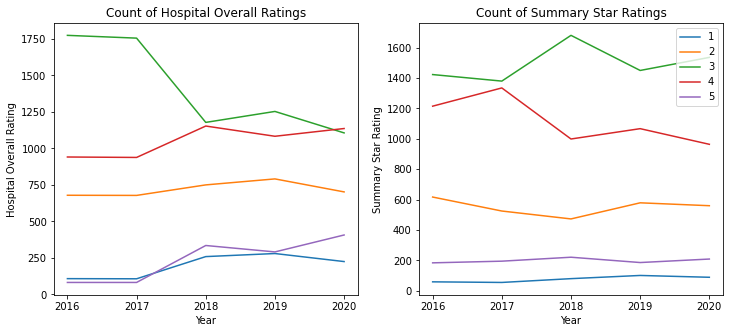

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axes.ravel()

hospital_df = df.groupby(["hospital_overall_rating", "year"])["hospital_overall_rating"].count().values.reshape(-1, 5)
patient_df = df.groupby(["summary_star_rating", "year"])["summary_star_rating"].count().values.reshape(-1, 5)

x = df.year.unique()
labels = [str(i) for i in range(1,6)]
for i in range(5):
  y = hospital_df[i]
  y2 = patient_df[i]
  ax1.plot(x, y, label=labels[i])
  ax2.plot(x, y2, label=labels[i])

  ax1.set_xlabel("Year")
  ax2.set_xlabel("Year")

  ax1.set_ylabel("Hospital Overall Rating")
  ax2.set_ylabel("Summary Star Rating")

  ax1.set_xticks(x)
  ax2.set_xticks(x)

  ax1.set_title("Count of Hospital Overall Ratings", loc="center")
  ax2.set_title("Count of Summary Star Ratings", loc="center")

plt.legend()

Line plot of the counts of the different summary star ratings across the 5 years.

In [ ]:
def plotbar(data, titl="2016 - 2020"):    
  tdf = pd.DataFrame()
  tdf["summary_star_rating"] = data["summary_star_rating"].value_counts()
  tdf["hospital_overall_rating"] = data["hospital_overall_rating"].value_counts()
  tdf["index"] = tdf.index
  tdf = tdf.astype(int)
  tidy = tdf.melt(id_vars='index').rename(columns=str.title)

  fig, ax = plt.subplots(figsize=(7, 5))
 
  sns.barplot(x='Index', y='Value', hue='Variable', data=tidy, ax=ax)
  sns.despine(fig)

  ax.set_xlabel("Ratings")
  ax.set_ylabel("Count")
  ax.set_title(titl, loc="center")



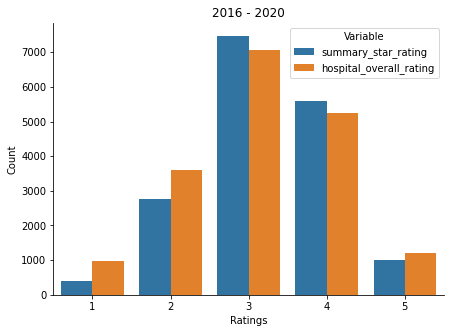

In [ ]:
plotbar(df)
plt.savefig(fpath+"all_count_bar.jpg", bbox_inches="tight")

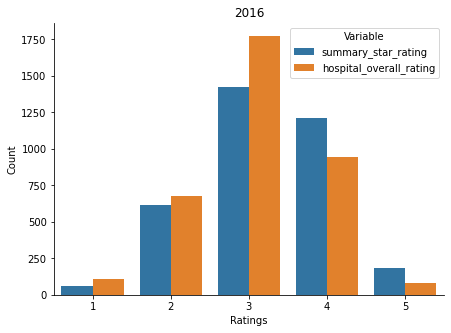

In [ ]:
plotbar(df[df.year == 2016], titl="2016")

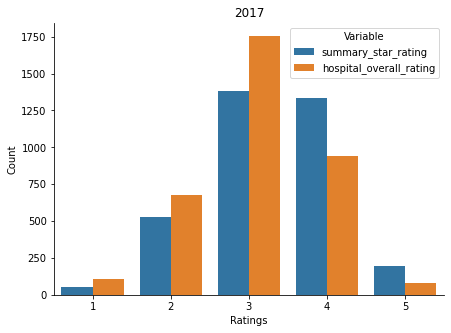

In [ ]:
plotbar(df[df.year == 2017], titl="2017")

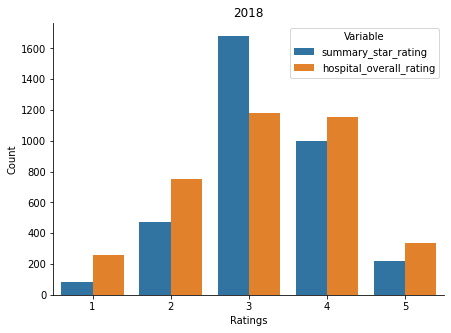

In [ ]:
plotbar(df[df.year == 2018], titl="2018")

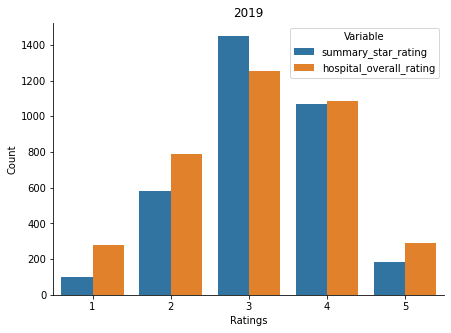

In [ ]:
plotbar(df[df.year == 2019], titl="2019")

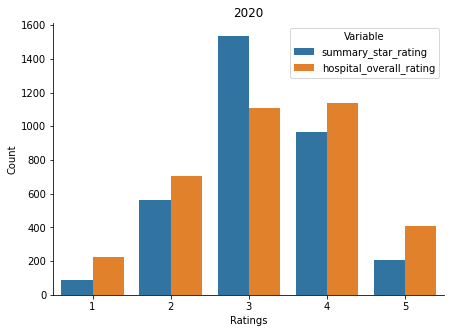

In [ ]:
plotbar(df[df.year == 2020], titl="2020")

## Statistical Analysis

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def cat_corr(data, year, prob=0.95, rating="summary_star_rating"):
    """
    Check for categorical correlation between two distributions: a and b, 
    using the chi-square analysis and p-value significance.
    """
    if year == "all":
        a = data["hospital_overall_rating"]
        b = data[rating]
        
    else:    
        temp_df = data[data.year == year]
        a = temp_df["hospital_overall_rating"]
        b = temp_df[rating]    
    
    pcorr = a.corr(b)
    
    crosst = pd.crosstab(a, b)
    stat, p, dof, expected = chi2_contingency(crosst)
    critical_val = chi2.ppf(prob, dof)
    alpha = 1.0 - prob
    
    verdict = "Independent"
    if abs(stat) >= critical_val and p <= alpha:
        verdict = "Dependent"
    
    return pcorr, critical_val, stat, p, verdict
    
def cat_corrdf(data, years, prob=0.95, rating="summary_star_rating"):
    """
    Tabulate analysis in cat_corr() for multiple years.
    """
    temp_df = pd.DataFrame(index=["Pearson Correlation", "Critical Value", "Statistic", "p-value", "Verdict"])
    for year in years:
        temp_df[year] = cat_corr(data, year, rating=rating)
    
    return temp_df.T

*Interpret test* <br>
Hypothesis: the variables do not have a significant relation

if abs(stat) >= critical_val:'Dependent: reject hypothesis'
else:'Independent: fail to reject hypothesis'

if p-value <= 0.05:'Dependent: reject hypothesis'
else:'Independent: fail to reject hypothesis'

<a href="https://www.geeksforgeeks.org/python-pearsons-chi-square-test/">Reference</a>

In [ ]:
years = [2016, 2017, 2018, 2019, 2020, "all"]
cat_corrdf(df, years)

,Pearson Correlation,Critical Value,Statistic,p-value,Verdict
2016,0.611711,26.296228,1643.911346,0.0,Dependent
2017,0.568542,26.296228,1384.488668,0.0,Dependent
2018,0.546353,26.296228,1281.854141,0.0,Dependent
2019,0.568721,26.296228,1367.332106,0.0,Dependent
2020,0.566742,26.296228,1314.287069,0.0,Dependent
all,0.561931,26.296228,6783.189997,0.0,Dependent


In [ ]:
star_ratings = ['summary_star_rating',
                'cleanliness_-_star_rating',
                'nurse_communication_-_star_rating',
                'doctor_communication_-_star_rating',
                'staff_responsiveness_-_star_rating',
                'communication_about_medicines_-_star_rating',
                'discharge_information_-_star_rating',
                'care_transition_-_star_rating',
                'overall_hospital_rating_-_star_rating',
                'quietness_-_star_rating',
                'recommend_hospital_-_star_rating']
len(star_ratings)

11

In [ ]:
years = [2016, 2017, 2018, 2019, 2020, "all"]
for rating in star_ratings:
    print(f"Patient Star Rating: {rating}")
    print(cat_corrdf(df, years, rating=rating))
    print()

Patient Star Rating: summary_star_rating
     Pearson Correlation Critical Value    Statistic p-value    Verdict
2016            0.611711      26.296228  1643.911346     0.0  Dependent
2017            0.568542      26.296228  1384.488668     0.0  Dependent
2018            0.546353      26.296228  1281.854141     0.0  Dependent
2019            0.568721      26.296228  1367.332106     0.0  Dependent
2020            0.566742      26.296228  1314.287069     0.0  Dependent
all             0.561931      26.296228  6783.189997     0.0  Dependent

Patient Star Rating: cleanliness_-_star_rating
     Pearson Correlation Critical Value    Statistic p-value    Verdict
2016            0.474986      26.296228   870.369581     0.0  Dependent
2017            0.458607      26.296228   817.761842     0.0  Dependent
2018            0.426143      26.296228   735.464807     0.0  Dependent
2019            0.430052      26.296228   729.582955     0.0  Dependent
2020            0.425788      26.296228   671.8

In [ ]:
#check correlation across 5 years for all star ratings
corrs = {}
for rating in star_ratings:
    corrs[rating] = cat_corr(df, "all", rating=rating)[0]

corrs_df = pd.DataFrame(pd.Series(corrs)).reset_index().sort_values(by=[0], ascending=False)

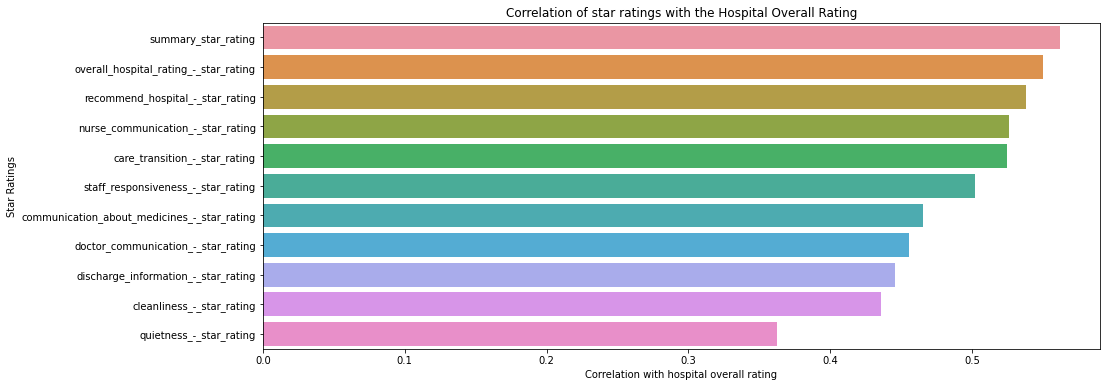

In [ ]:
plt.figure(figsize=(15,6))
plots = sns.barplot(x=0, y="index", data=corrs_df)
plt.xlabel("Correlation with hospital overall rating")
plt.ylabel("Star Ratings")
plt.title("Correlation of star ratings with the Hospital Overall Rating")
plt.savefig(fpath+"ratings_corr_bar.jpg", bbox_inches="tight")

It is observed that the summary star rating has the highest correlation with the hospital overall rating, across the five years time period, <br>
closely followed by the patient's overall hospital rating and the recommend hospital rating.

## Some Viz

In [ ]:
drop_df = df.replace(np.nan, 0)

In [ ]:
#use drop df(missing values have been replaced with 0)
tdf = drop_df[(drop_df.summary_star_rating != 0) & (drop_df.hospital_overall_rating != 0)].reset_index(drop=True)
tdf

,facility_id,year,facility_name,city,state,number_of_completed_surveys,survey_response_rate_percent,hospital_type,hospital_ownership,emergency_services,meets_criteria_for_promoting_interoperability_of_ehrs,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,summary_star_rating,nurse_communication_-_linear_mean_score,cleanliness_-_linear_mean_score,cleanliness_-_star_rating,nurse_communication_-_star_rating,doctor_communication_-_linear_mean_score,doctor_communication_-_star_rating,staff_responsiveness_-_linear_mean_score,staff_responsiveness_-_star_rating,pain_management_-_linear_mean_score,pain_management_-_star_rating,communication_about_medicines_-_linear_mean_score,communication_about_medicines_-_star_rating,discharge_information_-_linear_mean_score,discharge_information_-_star_rating,care_transition_-_linear_mean_score,care_transition_-_star_rating,overall_hospital_rating_-_linear_mean_score,overall_hospital_rating_-_star_rating,quietness_-_linear_mean_score,quietness_-_star_rating,recommend_hospital_-_linear_mean_score,recommend_hospital_-_star_rating
0,010001,2016,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,1213,27,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,3.0,90.0,84.0,2.0,3.0,92.0,3.0,79.0,2.0,86.0,2.0,79.0,3.0,89.0,4.0,82.0,3.0,89.0,4.0,88.0,4.0,89.0,3.0
1,010001,2017,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,1332,25,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,3.0,89.0,84.0,2.0,2.0,92.0,3.0,80.0,2.0,85.0,3.0,77.0,2.0,87.0,3.0,80.0,3.0,88.0,3.0,87.0,4.0,88.0,3.0
2,010001,2018,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,463,20,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3.0,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,2.0,88.0,83.0,2.0,2.0,90.0,3.0,77.0,1.0,0.0,0.0,73.0,2.0,85.0,3.0,79.0,2.0,86.0,3.0,86.0,4.0,86.0,3.0
3,010001,2019,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,558,23,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2.0,Below the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Above the national average,Same as the national average,2.0,88.0,87.0,3.0,2.0,90.0,2.0,79.0,2.0,0.0,0.0,73.0,2.0,86.0,3.0,80.0,2.0,85.0,2.0,86.0,4.0,87.0,3.0
4,010001,2020,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,535,22,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2.0,Below the national average,Same as the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,3.0,90.0,88.0,3.0,3.0,91.0,3.0,83.0,3.0,0.0,0.0,79.0,3.0,90.0,4.0,81.0,2.0,88.0,3.0,86.0,4.0,90.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,670108,2019,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,MARBLE FALLS,TX,453,22,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,5.0,Same as the national average,Same as the national average,Above the national average,Above the national average,Same as the national average,Above the national avera

In [ ]:
states = pd.read_csv(fpath+"datasets/usa_states.csv")
states_dict = dict(zip(states["Postal"], states["State"]))
states_dict.update( {"AS": "American Samoa",
          "GU": "Guam",
         "MP": "Northern Mariana Islands",
         "VI": "Virgin Islands",})
len(states_dict)

56

In [ ]:
#Calcculate average rating per state for all five years
average_ratings = []
for state in df["state"].unique():
    temp_df = tdf[tdf.state == state]
    summary_rating = round(temp_df.summary_star_rating.mean(), 2)
    hospital_rating = round(temp_df.hospital_overall_rating.mean(), 2)
    average_ratings.append((state, summary_rating, hospital_rating))

avg_df = pd.DataFrame(average_ratings, columns=["state", "average_summary_star_rating", "average_hospital_overall_rating"]).sort_values(by=["state"]).reset_index(drop=True)
avg_df["name"] = avg_df.state.map(states_dict)
avg_df

,state,average_summary_star_rating,average_hospital_overall_rating,name
0,AK,3.17,3.21,Alaska
1,AL,3.33,2.97,Alabama
2,AR,3.25,2.72,Arkansas
3,AS,NaN,NaN,American Samoa
4,AZ,2.77,3.02,Arizona
5,CA,2.62,2.88,California
6,CO,3.54,3.66,Colorado
7,CT,3.10,2.79,Connecticut
8,DC,1.94,1.56,District of Columbia
9,DE,3.17,3.33,Delaware


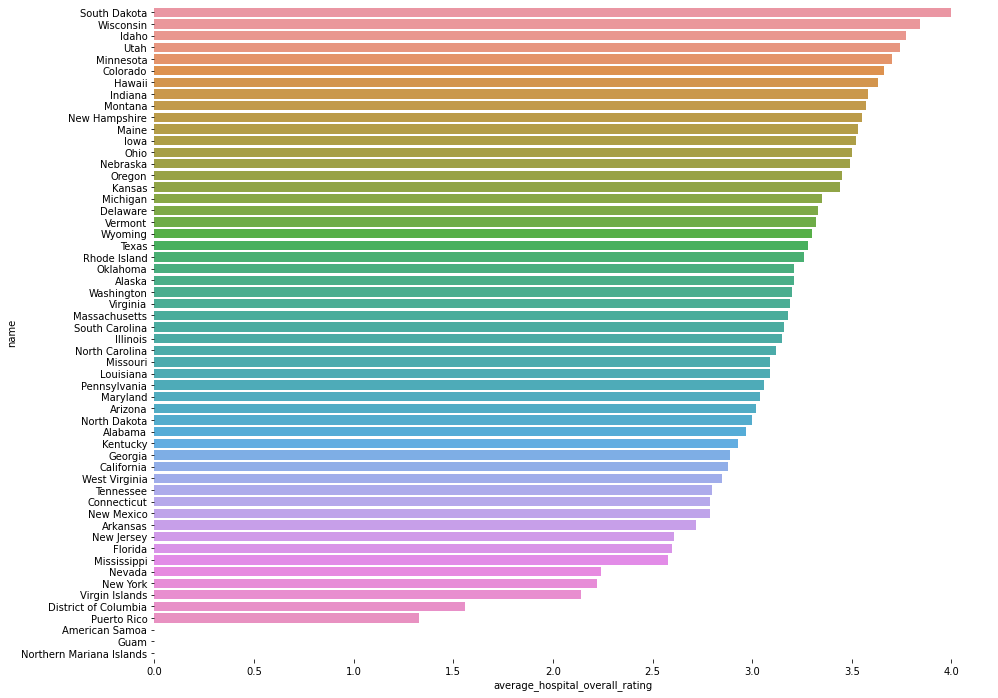

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(x="average_hospital_overall_rating", y="name", data=avg_df.sort_values(by=["average_hospital_overall_rating"], ascending=False))
sns.despine(left=True, bottom=True)

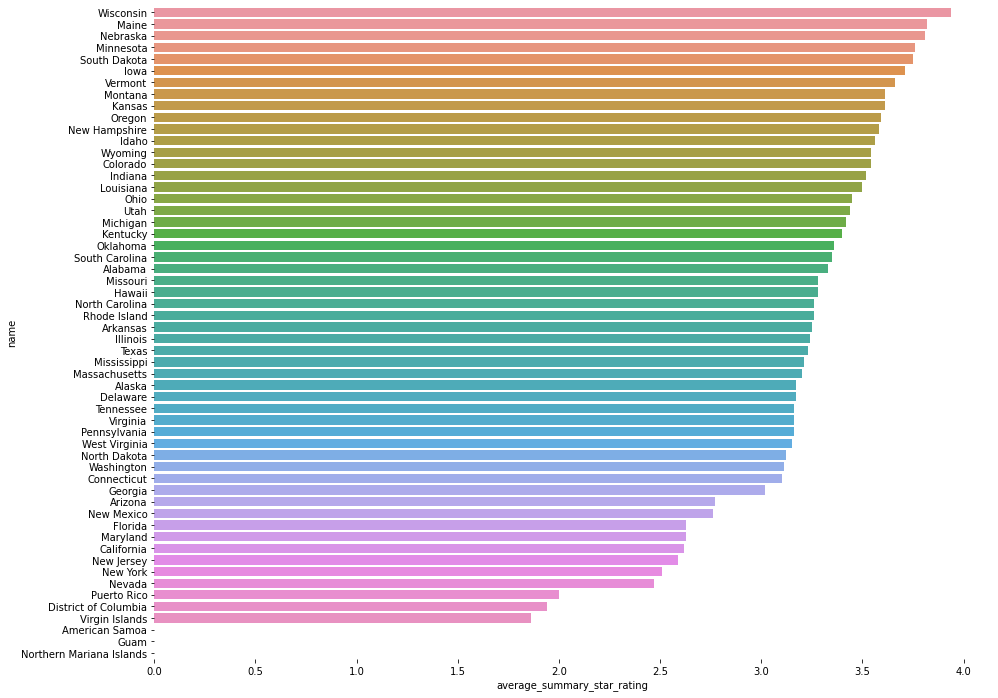

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(x="average_summary_star_rating", y="name", data=avg_df.sort_values(by=["average_summary_star_rating"], ascending=False))
sns.despine(left=True, bottom=True)

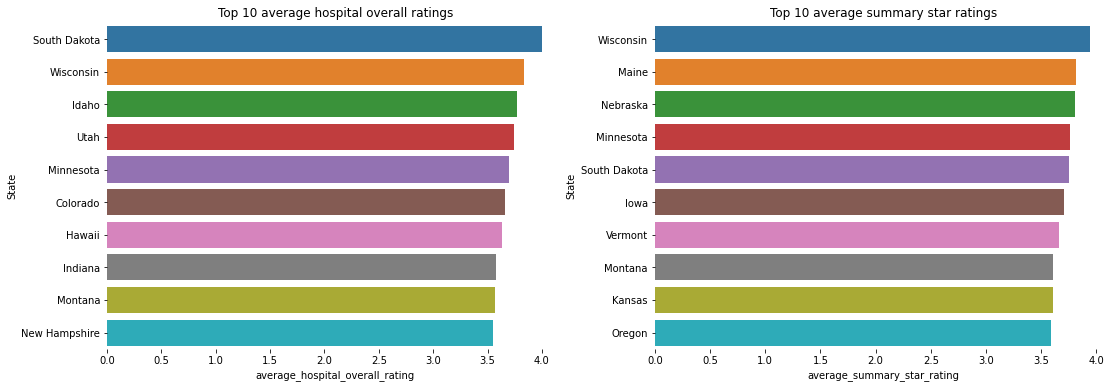

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax1, ax2 = axes

sns.barplot(x="average_hospital_overall_rating", y="name", 
            data=avg_df.sort_values(by=["average_hospital_overall_rating"], ascending=False)[:10],
           ax=ax1)
sns.barplot(x="average_summary_star_rating", y="name", 
            data=avg_df.sort_values(by=["average_summary_star_rating"], ascending=False)[:10],
           ax=ax2)
sns.despine(left=True, bottom=True)
ax1.set_title("Top 10 average hospital overall ratings")
ax2.set_title("Top 10 average summary star ratings")
ax1.set_ylabel("State")
ax2.set_ylabel("State")
plt.savefig(fpath+"top_10_bar.jpg", bbox_inches="tight")

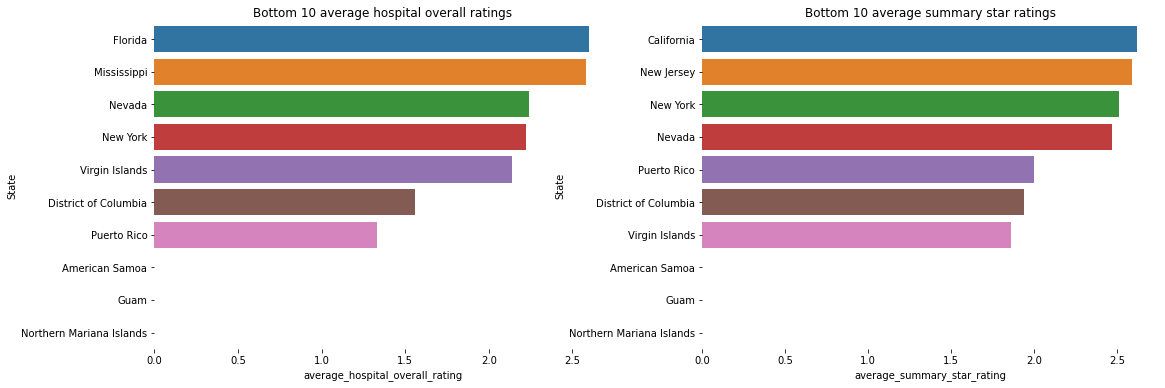

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax1, ax2 = axes

sns.barplot(x="average_hospital_overall_rating", y="name", 
            data=avg_df.sort_values(by=["average_hospital_overall_rating"], ascending=False)[46:],
           ax=ax1)
sns.barplot(x="average_summary_star_rating", y="name", 
            data=avg_df.sort_values(by=["average_summary_star_rating"], ascending=False)[46:],
           ax=ax2)
sns.despine(left=True, bottom=True)
ax1.set_title("Bottom 10 average hospital overall ratings")
ax2.set_title("Bottom 10 average summary star ratings")
ax1.set_ylabel("State")
ax2.set_ylabel("State")
plt.savefig(fpath+"bottom_10_bar.jpg", bbox_inches="tight")